# Исследование маркетинговых расходов Афиши

## Описание проекта

Отдел маркетинговой аналитики Афиши поставил задачу снизить расходы на маркетинг. По результатам исследования мы сможем отказаться от невыгодных источников трафика и перераспределить бюджет.

В нашем распоряжении данные Афиши с июня 2017 по конец мая 2018 года. Среди них:

- лог сервера с данными о посещениях сайта Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

### Цели и задачи исследования

**При подготовке данных:**

- Найти пропуски в значениях и заполнить, если это возможно/необходимо
- Найти и устранить дубликаты
- Заменить тип данных на корректный, если необходимо


**При анализе данных:**

- Изучить пользовательское поведение - как клиенты пользуются сервисом и когда делают первые покупки на сайте.
- Проследить показатели в динамике.
- Понять, сколько денег приносит компании каждый клиент и когда окупаются расходы на привлечение клиента.
- Определить, какие из рекламных источников наименее, а какие наиболее выгодны.

## Знакомство с данными

Импортируем библиотеки и отключим предупреждения.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

from IPython.display import HTML, display
import warnings

warnings.filterwarnings('ignore')

In [2]:
%%javascript # отключим автоскролл
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Загрузим таблицы с данными и сохраним в соответствующие переменные.

In [3]:
visits = pd.read_csv('visits_log.csv')
orders = pd.read_csv('orders_log.csv')
costs = pd.read_csv('costs.csv')

Объявим функцию `overview` для вывода базовой информации о таблицах, а также первых строк таблиц.

In [4]:
def overview(df_list):
    for x, y in df_list:
        display(HTML('<h2>Таблица ' + y + '</h2>'))
        display(x.head())
        display(x.info())
        display(x.describe())        

В список `tables` сохраним три таблицы с их названиями и вызовем функцию `overview`, чтобы поближе изучить имеющиеся данные.

In [5]:
tables = [[visits, 'visits'], [orders, 'orders'], [costs, 'costs']]
overview(tables)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


### Вывод

В нашем распоряжении три таблицы:

- `visits` - данные о посещениях сайта Афиши. Самая объемная таблица - почти 360 тысяч строк.
- `orders` - данные о всех заказах за этот период. Вторая по величине - 50 тысяч строк.
- `costs` - статистика расходов на привлечение клиентов. Это самая маленькая таблица (2500 строк), поскольку данные в ней сгруппированы по рекламным каналам, а не клиентам или сессиям.

Основные наблюдения:

- Названия столбцов заданы непоследовательно (вразнобой используются пробелы, нижние подчеркивания, разные регистры).
- Даты и время заданы в неправильном формате object, нужно привести их к формату datetime.
- Пропусков не обнаружено - количество ненулевых строк одинаково для всех столбцов в каждой из таблиц.
- Не хватает данных о продолжительности пользовательских сессий - нужно будет ее вычислить и добавить соответствующий столбец в таблицу `visits`.
- Стоит проверить столбец `Device` со строковыми данными на наличие дубликатов (например, по регистру).
- В таблице `orders` есть заказы с нулевой стоимостью. Это результат применения скидок и промо-кодов или ошибочные данные? Стоит проверить.
- Обращает на себя внимание довольно большой разброс данных в столбце _revenue_ таблицы `orders` и столбце _costs_ в таблице `costs`.

В остальном, данные выглядят корректными и явных ошибок не замечено.

## Предобработка данных

Для удобства работы переименуем столбцы и приведем их в единообразный вид. В таблице `costs` названия столбцов уже заданы в нижнем регистре и с подчеркиванием, поэтому их менять не будем.

In [6]:
visits = (visits.rename(columns={"Device": "device",
                            "Start Ts": "start_time", 
                            "End Ts": "end_time",
                            "Source Id": "source_id",
                            "Uid": "uid"})
         )

orders = (orders.rename(columns={"Buy Ts": "order_time",
                            "Revenue": "revenue", 
                            "Uid": "uid"})
       )

Выполним проверку, выведя начальные строки таблиц.

In [7]:
display(visits.head(2))
display(orders.head(2))

,device,end_time,source_id,start_time,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740


,order_time,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447


### Обработка дубликатов

Убедимся, что в таблицах нет полных дубликатов. Выполним операцию в цикле для списка `tables`, который был задан ранее.

In [8]:
for x, y in tables:
    print("Дубликатов в таблице", y, "-", x.duplicated().sum())

Дубликатов в таблице visits - 0
Дубликатов в таблице orders - 0
Дубликатов в таблице costs - 0


Прекрасно. Посмотрим теперь на столбец `device` в таблице `visits`, а именно на список уникальных значений в этом столбце.

In [9]:
visits.device.unique()

array(['touch', 'desktop'], dtype=object)

Вариантов всего два - десктопный компьютер или устройство с тачскрином (смартфон, планшет). Дубликатов нет, ~спим спокойно~ идем дальше.

### Обработка пропусков

Явных пропусков мы не увидели, но в таблице orders были заказы с нулевой стоимостью. Посмотрим, сколько таких строк.

In [10]:
print('Количество заказов с нулевой стоимостью:', orders.query('revenue == 0').count()[0])

Количество заказов с нулевой стоимостью: 51


In [11]:
# Также посмотрим, как нулевые заказы сгруппированы по пользовательским id

orders.query('revenue == 0').groupby('uid').agg('count')

,order_time,revenue
uid,,
184148767273119549,1,1
1149062814762747892,1,1
1879819502567241225,1,1
2037345392173160982,12,12
2636645662067512510,1,1
2883839899480223178,2,2
2936104404423239931,1,1
4927261749585088199,4,4
5342067285161169772,1,1


51 строка из 50 тысяч - это совсем немного, 0.1%. Отфильтруем эти строки, такое количество ни на что не повлияет.

In [12]:
orders = orders.query('revenue != 0')
print('Количество заказов с нулевой стоимостью:', orders.query('revenue == 0').count()[0])

Количество заказов с нулевой стоимостью: 0


Возможно, это покупки по промо-коду или тестовые покупки, выполненные сотрудниками Афиши. В пользу второго предположения говорит то, что сразу несколько User Id ассоциированы с несколькими бесплатными заказами (по 4, 6 или 12 штук). А что, если это случаи мошенничества и кто-то приобретает билеты обманным путем?

Узнаем у коллег подробнее, откуда берутся такие заказы.

### Изменение типа данных

Во всех таблицах были столбцы типа object, но с информацией о времени. Приведем их к типу datetime.

In [13]:
visits.start_time = pd.to_datetime(visits.start_time) 
visits.end_time = pd.to_datetime(visits.end_time)
orders.order_time = pd.to_datetime(orders.order_time)
costs.dt = pd.to_datetime(costs.dt)

Проверим, корректно ли применился тип данных, путем вызова аргумента dtypes для всех трех таблиц.

In [14]:
tables = [visits, orders, costs]

In [15]:
for table in tables:
    display(table.dtypes)

device                object
end_time      datetime64[ns]
source_id              int64
start_time    datetime64[ns]
uid                   uint64
dtype: object

order_time    datetime64[ns]
revenue              float64
uid                   uint64
dtype: object

source_id             int64
dt           datetime64[ns]
costs               float64
dtype: object

### Обработка аномальных значений

В самом начале при знакомстве с данными мы обратили внимание на разброс значений в двух столбцах: в обоих случаях речь шла о финансовых показателях.

К примеру, средняя стоимость заказа &mdash; 5 у.е., а максимальная &mdash; 2633. Аналогичная ситуация с расходами. 

Построим диаграмму размаха для интересующих нас столбцов.  

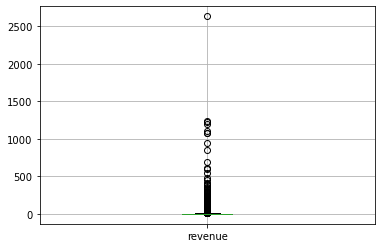

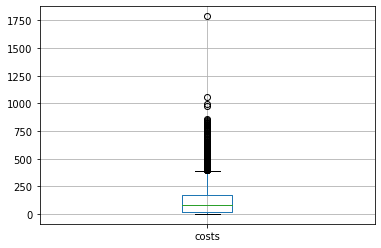

In [16]:
cost_data = [[orders, 'revenue'], [costs, 'costs']]

for x, y in cost_data:
    x.boxplot(column=y,
              figsize=(6,4))
    plt.show()

Видим, что на обеих диаграммах есть довольно заметный шлейф выбросов. Однако, удаляя их, мы рискуем потерять ценную информацию, поскольку дорогие заказы и большие расходы на маркетинг также составляют часть картины. 

Решено &mdash; значения оставляем, но будем иметь в виду, что эти данные могут сказаться на средних показателях.

### Вывод

В ходе предобработки данных мы:

- Привели названия столбцов в таблицах к единому виду (нижнее подчеркивание, регистр)
- Проверили таблицы на наличие дубликатов и их не обнаружили
- Убедились, что явных пропусков в таблицах нет
- Проверили случаи с нулевой стоимостью заказов и приняли решение удалить строки, так как их количество невелико
- Привели даты к типу данных datetime и убедились, что замена прошла корректно
- Проверили данные о стоимости заказов и расходах на наличие аномальных значений и приняли решение не удалять выбросы

## Исследовательский анализ данных

### Расчет продуктовых метрик

#### DAU, WAU и MAU

Для начала мы хотим поближе изучить пользовательскую активность. Перед расчетом метрик сделаем преобразования в таблице `visits`, а именно: округлим дату сессии и выделим в отдельные столбцы день, неделю, месяц и год, когда состоялась сессия.

In [17]:
visits['date'] = visits['start_time'].astype('datetime64[D]')
visits['week']  = visits['start_time'].astype('datetime64[W]')
visits['month'] = visits['start_time'].astype('datetime64[M]')
visits['year']  = visits['start_time'].astype('datetime64[Y]')

# выведем начало таблицы для проверки
visits.head()

,device,end_time,source_id,start_time,uid,date,week,month,year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017-01-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018-01-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017-01-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018-01-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,2017-01-01


Теперь изучим пользовательскую активность на Афише. Рассчитаем **среднюю посещаемость в день, неделю и месяц** за весь изучаемый период (у нас это год с июня 2017 по май 2018).

In [18]:
dau = visits.groupby('date').agg({'uid': 'nunique'}).mean()

wau = visits.groupby('week').agg({'uid': 'nunique'}).mean()

mau = visits.groupby('month').agg({'uid': 'nunique'}).mean()

print('DAU:', int(dau))
print('WAU:', int(wau))
print('MAU:', int(mau))

DAU: 907
WAU: 5724
MAU: 23228


В среднем в день сайт посещало 907 уникальных пользователей, в неделю &mdash; почти 6 тысяч, а за месяц &mdash; 23 тысячи с небольшим. Это говорит о том, что пользователи возвращались, т.е. по крайней мере часть клиентов &mdash; это постоянная аудитория.

Но это средние цифры. Посмотрим, как менялись эти показатели в течение года. 

Сохраним в отдельные переменные значения метрик по дням, неделям и месяцам.

In [19]:
dau_trend = visits.groupby('date').agg({'uid': 'nunique'})
wau_trend = visits.groupby('week').agg({'uid': 'nunique'})
mau_trend = visits.groupby('month').agg({'uid': 'nunique'})

Сохраним в список `visit_metrics` наши фреймы с метриками, названия метрик и подписи к оси x. Далее в цикле построим графики, чтобы посмотреть на метрики в динамике.

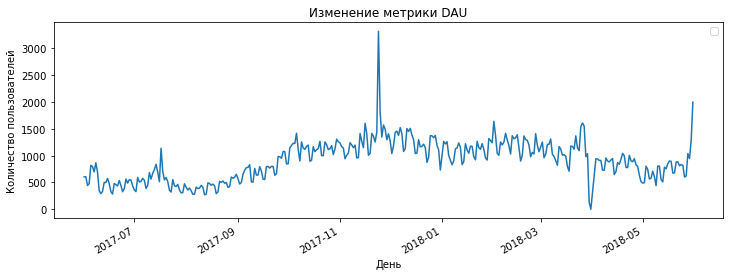

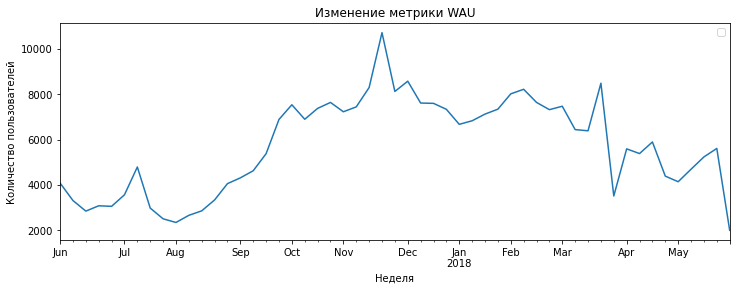

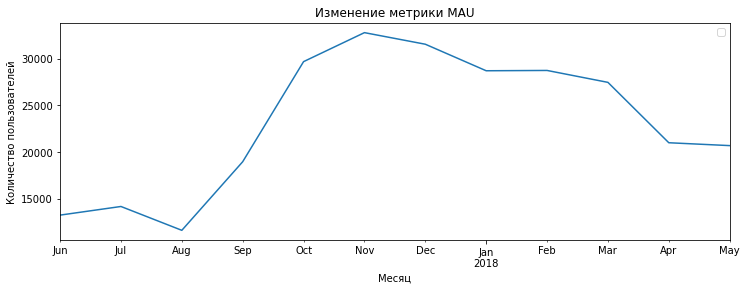

In [20]:
visit_metrics = [[dau_trend, 'DAU', 'День'], [wau_trend, 'WAU', 'Неделя'], [mau_trend, 'MAU', 'Месяц']]

for df, name, metric in visit_metrics:
    df.plot(y='uid', figsize=(12,4))
    plt.xlabel(metric)
    plt.ylabel('Количество пользователей')
    plt.title('Изменение метрики ' + name)
    plt.legend('_Hidden label')
    plt.show()
    print()

**DAU.** За исключением неожиданного всплеска в конце ноября и провала в конце марта, количество уникальных посетителей в день _держится примерно на одном уровне_ &mdash; в диапазоне 500-1000 пользователей. Пик может быть связан с рекламной акцией (по времени похоже на Black Friday/Cyber Monday), а вот с провалом непонятно. Могли быть проблемы на сервере Афиши: либо сервис был вообще недоступен пользователям, либо логи не сохранились или записались некорректно.

Также отчетливо видны короткие циклы активности. В течение месяца их насчитывается 4-5, то есть похоже на недельные циклы. Вероятно, в воскресенье-понедельник активность снижается, а в течение недели возрастает.

Несмотря на рост количества уникальных посетителей с октября 2017 г, далее эта метрика отличается стабильностью, а ближе к лету снижается. Явно следствие сезонности. А также показатель того, что несмотря на все маркетинговые активности, поднять объемы трафика непросто.

**WAU.** Видна похожая тенденция. Летние месяцы показывают спад. С октября по апрель метрика стабильно держится на уровне 7-8 тысяч и почти не меняется. Исключение &mdash; ноябрьский пик и мартовский спад, которые были так значительны, что отразились и на недельном количестве уникальных посетителей.
 
**MAU.** Август &mdash; самый неудачный месяц за весь год. В осенне-зимний период количество уникальных посетителей месяц почти вдвое больше, в чем в летние месяцы (30 тысяч против 15). 

Это только результат сезонности или есть здесь и заслуга маркетологов? Было бы ценно взглянуть на летние месяцы 2018 года, чтобы сравнить их с аналогичным периодом предыдущего года.

#### Среднее количество заходов в день

Мы рассчитали посещаемость на уровне пользователей. Теперь интересно понять, сколько раз за день пользователи в среднем заходят на сайт.

Сгруппируем таблицу `visits` по дате и посчитаем количество визитов и количество уникальных пользователей в день. Сохраним результат в новую переменную `sessions_per_day`. 

Далее вычислим, сколько визитов в среднем приходится на одного пользователя, и выведем первые строки таблицы.

In [21]:
sessions_per_day = visits.groupby('date').agg(
    {'uid': ['count', 'nunique']})

sessions_per_day.columns = ['n_sessions', 'n_users']
sessions_per_day['sessions_per_user'] = (
    sessions_per_day['n_sessions'] / sessions_per_day['n_users']
)

sessions_per_day.head()

,n_sessions,n_users,sessions_per_user
date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


In [22]:
print('Среднее количество заходов в день: {:.2f}'.format(sessions_per_day['sessions_per_user'].mean()))

Среднее количество заходов в день: 1.08


Итак, в среднем пользователи заходят на сайт Афиши раз в день. Где же вы, наши преданные поклонники?

Посмотрим, менялась ли эта величина со временем.

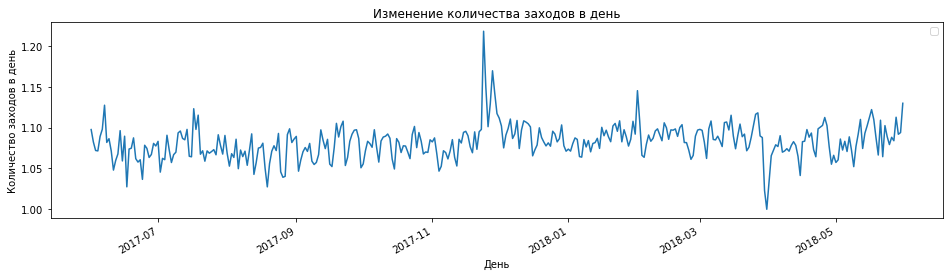

In [23]:
sessions_per_day['sessions_per_user'].plot(y='sessions_per_user', figsize=(16,4))
plt.xlabel('День')
plt.ylabel('Количество заходов в день')
plt.title('Изменение количества заходов в день')
plt.legend('_Hidden label')
plt.show()

Видим, что за целый год _практически ничего не изменилось_. В среднем примерно 1 сессия в день, ни больше ни меньше. Также заметны недельные циклы активности, как и с метрикой DAU.

Пик активности в конце ноября сказался и на этом показателе: среднее количество заходов подросло до 1,2, но на фоне целого года это не слишком существенно.

#### Продолжительность пользовательских сессий

Если пользователи посещают Афишу всего раз в день, то, возможно, они хотя бы зависают на сайте, изучая предложения? Это могло бы повысить вероятность того, что они найдут что-то для себя интересное и совершат покупку.

Для начала вычислим продолжительность каждой сессии, сохраним в секунды и запишем результат в столбец `duration`.

In [24]:
visits['duration'] = (visits['end_time'] - visits['start_time']).dt.seconds
visits.head()

,device,end_time,source_id,start_time,uid,date,week,month,year,duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017-01-01,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018-01-01,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017-01-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018-01-01,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,2017-01-01,0


Кто по 15 минут сидит, а кто уходит сразу... Посмотрим на график распределения продолжительности пользовательских сессий.

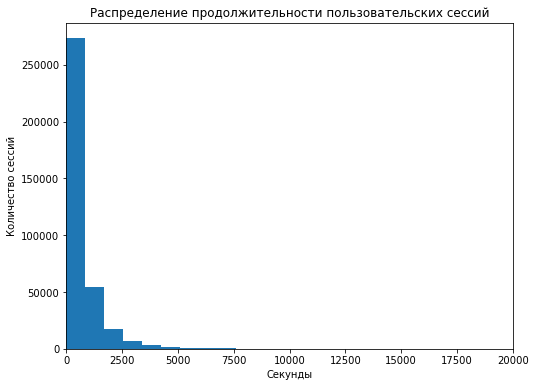

In [25]:
visits['duration'].plot(kind='hist', bins=100, figsize=(8,6), xlim=(0, 20000))
plt.xlabel('Секунды')
plt.ylabel('Количество сессий')
plt.title('Распределение продолжительности пользовательских сессий')
plt.show()

Распределение одностороннее, с пиком в области нуля и длинным хвостом. По графику понятно, что мода будет стремиться к нулю (ну или к очень низкому значению). Такая большая доля коротких сессий &mdash; естественное явление: пользователи могли открыть сайт случайно, получить ошибку при загрузке и т.п.

Среднее (mean) не подойдет из-за асимметричности распределения. Поэтому для оценки средних значений возьмем медиану, но для полноты картины посмотрим и на моду.

In [26]:
print('Наиболее частая продолжительность сессии: {:.0f} секунд.'.format(visits['duration'].mode()[0]))
print('Средняя продолжительность сессии: {:.0f} секунд.'.format(visits['duration'].median()))

Наиболее частая продолжительность сессии: 60 секунд.
Средняя продолжительность сессии: 300 секунд.


Угнать за 60 секунд. Если кто-то и успевает купить за это время билеты на сайте Афиши, он большой молодец. А вот за 5 минут уже можно спокойно полистать каталог и приобрести билеты.

Также имеет смысл сравнить ситуацию для мобильных устройств и десктопов. Для этого построим гистограмму и рассчитаем величину медианы.

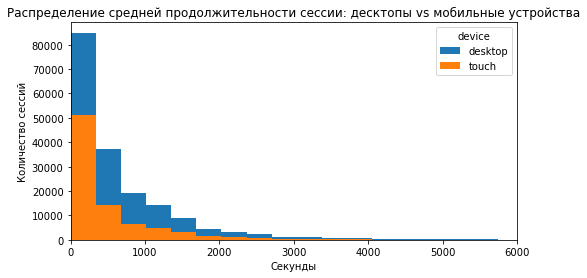

In [27]:
(visits.pivot_table(
    index='start_time', 
    columns = 'device', 
    values='duration', 
    aggfunc='median')
        .plot(kind='hist', bins=250, figsize=(8,4), xlim=(0, 6000))
)

plt.title('Распределение средней продолжительности сессии: десктопы vs мобильные устройства')
plt.xlabel('Секунды')
plt.ylabel('Количество сессий')
plt.show()

In [28]:
average_dur = (visits.pivot_table(
    index='start_time', 
    columns = 'device', 
    values='duration', 
    aggfunc='median').median())
    
print('Средняя продолжительность сессии на десктопе: {:.0f} секунд.'.format(average_dur[0]))
print('Средняя продолжительность сессии на мобильных устройствах: {:.0f} секунд.'.format(average_dur[1]))

Средняя продолжительность сессии на десктопе: 360 секунд.
Средняя продолжительность сессии на мобильных устройствах: 240 секунд.


В среднем на мобильных устройствах сессии короче на 1 минуту. Скорее всего, здесь сказывается специфика использования &mdash; мобильными устройствами часто пользуются на ходу, в паузе между другими делами и т.п. Какой-то системной проблемы здесь, скорее всего нет.

#### Расчет Retention Rate

Итак, мы выяснили, что пользователи заходят не больше раза в день и проводят на сайте Афиши в среднем 4-5 минут в зависимости от используемого устройства.

Посмотрим, насколько часто пользователи к нам возвращаются. Для этого применим когортный анализ.

На примере других метрик (DAU/WAU/MAU, среднего количества визитов и продолжительности сессий) мы уже видели, что недельные колебания не слишком значительны. При этом данные у нас за целый год. Поэтому будем выделять когорты посетителей сайта по месяцам.

Итак, в наших когортах **событие** &mdash; это посещение сайта Афиши, а **период** &mdash; 1 месяц.

Для всех пользователей найдем дату первого посещения сайта.

In [29]:
first_visit = visits.groupby('uid')['date'].min()

# переименуем Series
first_visit.name = 'first_date'

# выведем начальные строки
first_visit.head()

uid
11863502262781    2018-03-01
49537067089222    2018-02-06
297729379853735   2017-06-07
313578113262317   2017-09-18
325320750514679   2017-09-30
Name: first_date, dtype: datetime64[ns]

Присоединим эти данные к нашей таблице `visits` по столбцу `uid`. Далее выведем таблицу, отсортированную по user id, с тем чтобы проверить, как вычислена дата первого визита.

In [30]:
visits = visits.join(first_visit, on='uid')
visits.sort_values(by='uid').head(10)

,device,end_time,source_id,start_time,uid,date,week,month,year,duration,first_date
196543,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,11863502262781,2018-03-01,2018-03-01,2018-03-01,2018-01-01,360,2018-03-01
257333,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,49537067089222,2018-02-06,2018-02-01,2018-02-01,2018-01-01,120,2018-02-06
173818,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,297729379853735,2017-06-07,2017-06-01,2017-06-01,2017-01-01,60,2017-06-07
113873,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,313578113262317,2018-03-11,2018-03-08,2018-03-01,2018-01-01,360,2017-09-18
192554,desktop,2018-02-18 15:26:00,2,2018-02-18 15:17:00,313578113262317,2018-02-18,2018-02-15,2018-02-01,2018-01-01,540,2017-09-18
173142,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,313578113262317,2017-09-18,2017-09-14,2017-09-01,2017-01-01,1080,2017-09-18
41778,desktop,2018-02-26 12:34:00,5,2018-02-26 12:33:00,325320750514679,2018-02-26,2018-02-22,2018-02-01,2018-01-01,60,2017-09-30
34588,desktop,2017-09-30 14:38:00,5,2017-09-30 14:29:00,325320750514679,2017-09-30,2017-09-28,2017-09-01,2017-01-01,540,2017-09-30
188450,touch,2018-01-18 12:33:00,4,2018-01-18 12:32:00,397399764396656,2018-01-18,2018-01-18,2018-01-01,2018-01-01,60,2018-01-18
183750,desktop,2017-06-17 13:45:00,2,2017-06-17 13:40:00,407573351275847,2017-06-17,2017-06-15,2017-06-01,2017-01-01,300,2017-06-17


Месяц каждого визита у нас уже есть в столбце `month`, осталось выделить месяц первого визита. Сделаем это при помощи округления даты первого визита.

In [31]:
visits['first_month'] = visits['first_date'].astype('datetime64[M]')

visits.head()

,device,end_time,source_id,start_time,uid,date,week,month,year,duration,first_date,first_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017-01-01,1080,2017-12-20,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018-01-01,1680,2018-02-19,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017-01-01,0,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018-01-01,1440,2018-03-09,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,2017-01-01,0,2017-12-27,2017-12-01


Рассчитаем срок активности пользователя - параметр `lifetime`. Для каждого посещения (=строки в датафрейме) подсчитаем порядковый номер месяца с момента первого прихода на сайт.

In [32]:
visits['lifetime'] = (visits.month - visits.first_month)/np.timedelta64(1, 'M')
visits['lifetime'] = visits['lifetime'].round().astype('int')
visits.head()

,device,end_time,source_id,start_time,uid,date,week,month,year,duration,first_date,first_month,lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017-01-01,1080,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018-01-01,1680,2018-02-19,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017-01-01,0,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018-01-01,1440,2018-03-09,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,2017-01-01,0,2017-12-27,2017-12-01,0


Сгруппируем данные по столбцу `first_month`, то есть нашим когортам, и "сроку жизни" пользователя.

In [33]:
cohorts = visits.groupby(['first_month', 'lifetime']).agg({'uid': 'nunique'}).reset_index()
cohorts.head()

,first_month,lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


В столбце `uid` получили количество уникальных пользователей в данной когорте на определенный месяц жизни (lifetime). 

Чтобы вычислить Retention rate, необходимо узнать, сколько в когорте было пользователей изначально &mdash; то есть, на нулевой месяц.

In [34]:
n_users = cohorts[cohorts['lifetime'] == 0][['first_month', 'uid']]

# переименуем столбец
n_users = n_users.rename(columns={'uid': 'day0_users'})

n_users

,first_month,day0_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


Присоединим эти данные к данным по когортам и рассчитаем Retention rate.

In [35]:
cohorts = cohorts.merge(n_users, on='first_month')
cohorts['first_month'] = cohorts['first_month'].dt.strftime('%Y-%m')
cohorts.head()

,first_month,lifetime,uid,day0_users
0,2017-06,0,13259,13259
1,2017-06,1,1043,13259
2,2017-06,2,713,13259
3,2017-06,3,814,13259
4,2017-06,4,909,13259


In [36]:
cohorts['retention'] = cohorts['uid']/cohorts['day0_users']
cohorts.head()

,first_month,lifetime,uid,day0_users,retention
0,2017-06,0,13259,13259,1.000000
1,2017-06,1,1043,13259,0.078664
2,2017-06,2,713,13259,0.053775
3,2017-06,3,814,13259,0.061392
4,2017-06,4,909,13259,0.068557


Для удобства анализа обратимся к визуализации. Построим сводную таблицу по когортам и сроку жизни (lifetime), а затем визуализируем при помощи тепловой карты.

In [37]:
cohorts_pivot = (cohorts.pivot_table(
                    index='first_month', 
                    columns='lifetime', 
                    values='retention',
                    aggfunc='sum'))

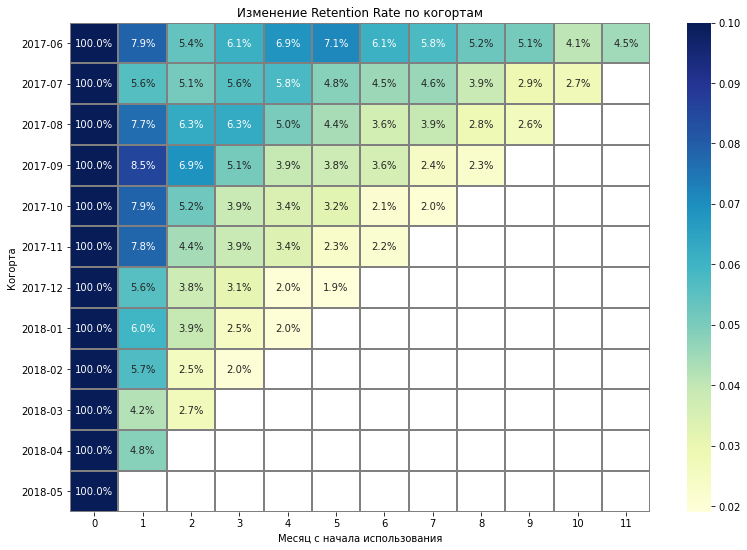

In [38]:
plt.figure(figsize=(13, 9))
sns.heatmap(cohorts_pivot, 
            annot=True, 
            fmt='.1%', 
            linewidths=1, 
            linecolor='gray', 
            cmap="YlGnBu",
            vmax=0.1)
plt.xlabel('Месяц с начала использования')
plt.ylabel('Когорта')
plt.title('Изменение Retention Rate по когортам')
plt.show()

Картина печальная. Посмотрим на коэффициент удержания _спустя месяц_. Во всех когортах остается не более 7-8% от первоначального количества пользователей. Лучшая когорта в этом плане &mdash; сентябрьская. У пользователей из весенних когорт **retention rate** в первый месяц падает еще больше &mdash; в марте-апреле он составил 4.2% и 4.8% соответственно. 

Посмотрим, чему равен средний Retention Rate на второй и третий месяцы «жизни» когорт.

In [39]:
cohorts_pivot = cohorts_pivot.reset_index()
print('Средний коэффициент удержания на второй месяц: {:.2%}'.format(cohorts_pivot[2].mean()))
print('Средний коэффициент удержания на третий месяц: {:.2%}'.format(cohorts_pivot[3].mean()))

Средний коэффициент удержания на второй месяц: 4.63%
Средний коэффициент удержания на третий месяц: 4.28%


С каждым месяцем средний коэффициент падает. Это естественный процесс. Но похоже, что есть разница и в поведении когорт.

_Спустя 3 месяца_ в самой первой когорте оставалось еще 6-7% пользователей, в то время как у более поздних когорт коэффициент составляет всего 2-3%.

Вывод &mdash; за год ситуация ухудшилась. С каждой новой когортой всё меньше пользователей приходят повторно на сайт Афиши. Причины могут быть разными &mdash; например, конкуренция с другими площадками или неудачный user experience.

#### Выводы

Изучив продуктовые метрики, можно заключить:

- Средняя посещаемость сайта в день, неделю и месяц держится примерно на одном уровне, за исключением летних месяцев. Летом наблюдается спад. Влияние ли это сезонности, судить сложно, поскольку нет аналогичных данных за предыдущий период.
- Среднее количество заходов в день меняется мало и равно 1 сессии в день. Чаще пользователи заходят только в периоды рекламных акций, но это случается редко (на графиках виден один такой эпизод).
- Продолжительность пользовательских сессий в среднем составляет 5 минут. Похоже, что есть зависимость от типа используемого устройства - на мобильных устройствах средняя продолжительность ниже примерно на минуту. Также есть очень большая доля коротких сессий длительностью 1 минуту.
- Коэффициент удержания довольно низкий и падает у более поздних когорт. Спустя месяц в ранних когортах оставалось не более 7-8%, а в более поздних - всего 4-5%. Самая "долгоживущая" когорта в этом смысле - июньская.

### Метрики электронной коммерции

#### Среднее время до совершения покупки

Посмотрим, сколько времени в среднем пользователям Афиши нужно, чтобы перейти к первой покупке. Ранее мы уже рассчитывали дату первого посещения сайта при вычислении Retention Rate. Теперь сделаем то же самое для покупок. 

Данные о заказах хранятся в таблице `orders`. Для начала округлим дату совершения заказа до одного дня.

In [40]:
orders['order_date'] = orders['order_time'].astype('datetime64[D]')

In [41]:
# сгруппируем данные по пользователям и оставим самую раннюю дату заказа
first_order = orders.groupby('uid')['order_date'].min().reset_index()

# переименуем столбец
first_order = first_order.rename(columns={'order_date': 'first_order'})

# выведем начальные строки
first_order.head()

,uid,first_order
0,313578113262317,2018-01-03
1,1575281904278712,2017-06-03
2,2429014661409475,2017-10-11
3,2464366381792757,2018-01-28
4,2551852515556206,2017-11-24


Итак, у нас есть датафрейм с датой первого заказа, а также Series с датой первого посещения сайта. Объединим их по столбцу uid &mdash; идентификатору пользователя.

In [42]:
visit_to_order = first_order.join(first_visit, on='uid')
visit_to_order.head()

,uid,first_order,first_date
0,313578113262317,2018-01-03,2017-09-18
1,1575281904278712,2017-06-03,2017-06-03
2,2429014661409475,2017-10-11,2017-10-11
3,2464366381792757,2018-01-28,2018-01-27
4,2551852515556206,2017-11-24,2017-11-24


В новый столбец `span` сохраним разницу между датой первого посещения и датой первой покупки, а также переведем ее в дни.

In [43]:
visit_to_order['span'] = (visit_to_order['first_order'] - visit_to_order['first_date']).dt.days
visit_to_order.head(10)

,uid,first_order,first_date,span
0,313578113262317,2018-01-03,2017-09-18,107
1,1575281904278712,2017-06-03,2017-06-03,0
2,2429014661409475,2017-10-11,2017-10-11,0
3,2464366381792757,2018-01-28,2018-01-27,1
4,2551852515556206,2017-11-24,2017-11-24,0
5,3077748354309989,2018-03-03,2018-03-03,0
6,3605148382144603,2017-09-21,2017-08-15,37
7,3753586865891862,2018-03-03,2018-03-03,0
8,4808417689019433,2018-01-09,2018-01-09,0
9,4992223027560440,2018-04-04,2018-04-04,0


Уже в первых строках видим несколько нулей &mdash; это значит, что пользователь совершает покупку в день первого посещения. Посмотрим на распределение этих данных при помощи гистограммы.

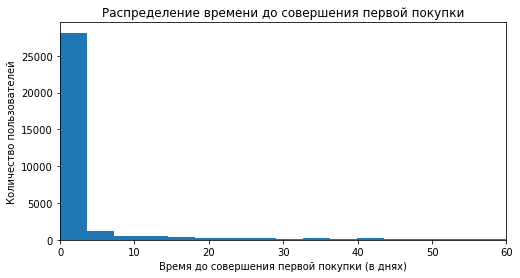

In [44]:
visit_to_order['span'].plot(kind='hist', bins=100, xlim=(0,60), figsize=(8, 4))
plt.title('Распределение времени до совершения первой покупки')
plt.xlabel('Время до совершения первой покупки (в днях)')
plt.ylabel('Количество пользователей')
plt.show()

Видим пик в области нуля и длинный хвост в сторону увеличения значений. Распределение не симметрично и не является нормальным, значит для расчета среднего значения предпочтительнее использовать медиану, нежели среднее.

In [45]:
print('Среднее время от первого визита до первой покупки: {:.0f} дней.'.format(visit_to_order['span'].median()))

Среднее время от первого визита до первой покупки: 0 дней.


Вырисовывается **портрет покупателя**. Те, кто делают заказ на Афише, обычно поступают так: приходят на сайт, делают сразу же заказ и затем уходят, чтобы больше не возвращаться. 

Получается конвейер из новых клиентов, на привлечение которых и уходит маркетинговый бюджет. Как мы обнаружили, Retention Rate довольно низкий и падает с каждой последующей когортой. Значит, это и есть точка роста, и нужно будет направить усилия на удержание существующих клиентов, например: 

- отправлять им рассылку с интересными предложениями
- просить обратную связь
- оптимизировать дизайн сайта

#### Cреднее количество покупок

Выделим когорты покупателей, но на этот раз событием будет покупка на сайте, а не посещение. За период также возьмем 1 месяц.

Обратимся к сформированному ранее датафрейму `first_order` и в отдельный столбец сохраним месяц первого заказа.

In [46]:
first_order['first_order_month'] = first_order['first_order'].astype('datetime64[M]')
first_order.head()

,uid,first_order,first_order_month
0,313578113262317,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11,2017-10-01
3,2464366381792757,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24,2017-11-01


Теперь вычислим количество уникальных покупателей в каждой когорте.

In [47]:
un_buyers = (first_order
              .groupby('first_order_month')
              .agg({'uid': 'nunique'})
              .reset_index())

un_buyers.head()

,first_order_month,uid
0,2017-06-01,2022
1,2017-07-01,1922
2,2017-08-01,1369
3,2017-09-01,2579
4,2017-10-01,4340


Далее добавим месяц первой покупки в исходную таблицу `orders`. Также выделим из даты покупки (`order_date`) месяц и сохраним в столбец `order_month`.

In [48]:
# выделим месяц из даты покупки
orders['order_month'] = orders['order_date'].astype('datetime64[M]')

# оставим нужные столбцы в first_order
first_order = first_order[['uid', 'first_order_month']]

# объединим таблицы
orders = orders.merge(first_order, on='uid')

orders.head()

,order_time,revenue,uid,order_date,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


Теперь мы можем сформировать когорты по месяцу первой покупки. Просуммируем количество неуникальных пользователей &mdash; это и будет количество заказов в данный месяц.

In [49]:
order_cohorts = (orders
                .groupby(['first_order_month', 'order_month'])
                .agg({'uid': 'count'})
                .reset_index()
                )
order_cohorts = order_cohorts.rename(columns={'uid': 'order_n'})

order_cohorts.head()

,first_order_month,order_month,order_n
0,2017-06-01,2017-06-01,2353
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,171
3,2017-06-01,2017-09-01,224
4,2017-06-01,2017-10-01,291


Добавим в таблицу количество уникальных пользователей за каждый месяц.

In [50]:
order_cohorts = order_cohorts.merge(un_buyers, on='first_order_month')
order_cohorts = order_cohorts.rename(columns={'uid': 'un_buyers'})

order_cohorts.head()

,first_order_month,order_month,order_n,un_buyers
0,2017-06-01,2017-06-01,2353,2022
1,2017-06-01,2017-07-01,177,2022
2,2017-06-01,2017-08-01,171,2022
3,2017-06-01,2017-09-01,224,2022
4,2017-06-01,2017-10-01,291,2022


Для удобства анализа заменим месяц покупки на относительный "возраст" когорты, т.е. запишем для каждой когорты номер месяца, в который сделана покупка, начиная с первого заказа.

In [51]:
order_cohorts['age'] = (order_cohorts['order_month'] - order_cohorts['first_order_month']) / np.timedelta64(1, 'M')

order_cohorts['age'] = order_cohorts['age'].round().astype('int')

order_cohorts.head() 

,first_order_month,order_month,order_n,un_buyers,age
0,2017-06-01,2017-06-01,2353,2022,0
1,2017-06-01,2017-07-01,177,2022,1
2,2017-06-01,2017-08-01,171,2022,2
3,2017-06-01,2017-09-01,224,2022,3
4,2017-06-01,2017-10-01,291,2022,4


Теперь найдем среднее количество покупок: разделим количество заказов на число уникальных пользователей.

In [52]:
order_cohorts['order_by_user'] = order_cohorts['order_n'] / order_cohorts['un_buyers']

Сформируем сводную таблицу и подсчитаем среднее количество заказов с накоплением.

In [53]:
order_pivot = (order_cohorts
              .pivot_table(index='first_order_month',
                          columns='age',
                          values='order_by_user',
                          aggfunc='mean'))

order_pivot.cumsum(axis=1).round(2).fillna(0) 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.16,1.25,1.34,1.45,1.59,1.70,1.83,1.92,2.03,2.10,2.15,2.19
2017-07-01,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,0.00
2017-08-01,1.12,1.20,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.60,0.00,0.00
2017-09-01,1.14,1.22,1.28,1.35,1.37,1.41,1.46,1.48,1.50,0.00,0.00,0.00
2017-10-01,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,0.00,0.00,0.00,0.00
2017-11-01,1.18,1.27,1.32,1.37,1.40,1.42,1.44,0.00,0.00,0.00,0.00,0.00
2017-12-01,1.15,1.21,1.26,1.30,1.32,1.34,0.00,0.00,0.00,0.00,0.00,0.00
2018-01-01,1.12,1.19,1.24,1.25,1.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2018-02-01,1.12,1.18,1.20,1.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Для удобства отображения данных визуализируем таблицу на тепловой карте.

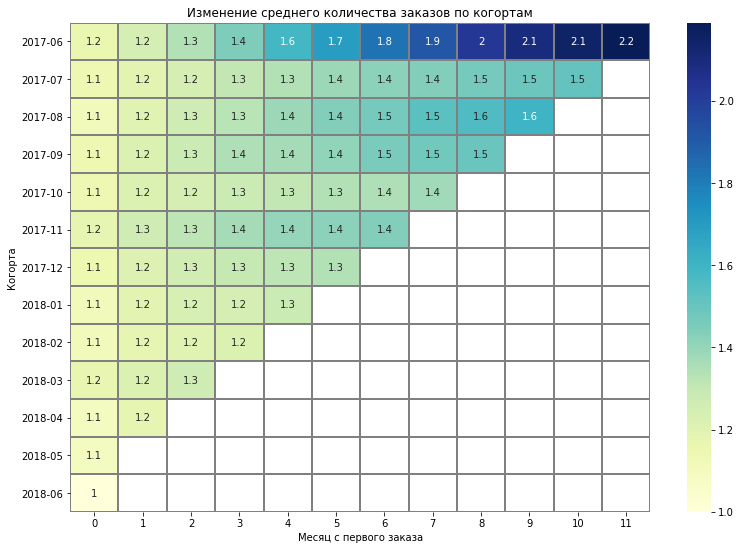

In [54]:
plt.figure(figsize=(13, 9))

ax = sns.heatmap(order_pivot.cumsum(axis=1).round(2), 
            annot=True, 
            linewidths=1, 
            linecolor='gray', 
            cmap="YlGnBu"
            )

ax.set_yticklabels(order_pivot.index.strftime('%Y-%m')) 

plt.xlabel('Месяц с первого заказа')
plt.ylabel('Когорта')
plt.title('Изменение среднего количества заказов по когортам')
plt.show()

Видим, что в среднем количество покупок колеблется между 1 и 2. В самой первой когорте (июнь 2017) среднее число покупок на пользователя достигло 2 спустя 8 месяцев. 

Если сравнивать с данными других когорт, то первая &mdash; самая покупающая: практически в каждый месяц жизни показатель среднего количества покупок выше, чем в те же месяцы для более поздних когорт.

Также подсчитаем среднее для всех когорт на каждый месяц их жизни &mdash; так называемую среднюю когорту. 

In [55]:
order_pivot.cumsum(axis=1).mean(axis=0) 

age
0     1.124775
1     1.211874
2     1.268104
3     1.317606
4     1.376180
5     1.433206
6     1.496257
7     1.551142
8     1.641087
9     1.728120
10    1.830948
11    2.190900
dtype: float64

Получается, что за полгода среднее количество покупок на пользователя составляет 1.5, а за год &mdash; около 2.

Это согласуется с предыдущими наблюдениями о том, что в среднем пользователи сайта _не слишком активны:_ проводят на сайте в среднем около 5 минут, заходят не чаще раза в день и в принципе редко возвращаются. 

#### Средний чек

Поскольку у нас данные за целый год, удобнее будет считать **средний чек за месяц**. Для этого сгруппируем таблицу `orders` по месяцу заказа и подсчитаем сумму выручки и количество заказов за этот период. 

In [56]:
orders.groupby('order_month').agg({'revenue': 'sum', 'uid': 'count'})

,revenue,uid
order_month,,
2017-06-01,9557.49,2353
2017-07-01,12539.47,2362
2017-08-01,8758.78,1803
2017-09-01,18345.51,3383
2017-10-01,27987.70,5677
2017-11-01,27069.93,5644
2017-12-01,36388.60,6206
2018-01-01,19417.13,4721
2018-02-01,25560.54,5280


Выяснилось, что в июне 2018 у нас единственный заказ, в то время как в предыдущие месяцы количество заказов исчисляется тысячами. 

Чтобы не искажать картину &mdash; и сейчас, и в будущих расчетах &mdash; уберем эту строку сразу из исходной таблицы `orders`. Далее сохраним сгруппированные данные в переменную `average_spend`.

In [57]:
orders = orders.query('order_month != "2018-06-01"')

In [58]:
average_spend = (orders
                 .groupby('order_month')
                 .agg({'revenue': 'sum', 'uid': 'count'})
                 .reset_index())
average_spend

,order_month,revenue,uid
0,2017-06-01,9557.49,2353
1,2017-07-01,12539.47,2362
2,2017-08-01,8758.78,1803
3,2017-09-01,18345.51,3383
4,2017-10-01,27987.70,5677
5,2017-11-01,27069.93,5644
6,2017-12-01,36388.60,6206
7,2018-01-01,19417.13,4721
8,2018-02-01,25560.54,5280
9,2018-03-01,28834.59,5325


Все в порядке, данные охватывают период с июня 2017 по май 2018 года, а количество заказов распределено достаточно равномерно.

Теперь сделаем необходимые расчеты и сохраним результат в новый столбец `average_bill`.

In [59]:
# переименуем столбец
average_spend = average_spend.rename(columns={'uid': 'order_n'})

# рассчитаем средний чек
average_spend['average_bill'] = average_spend['revenue'] / average_spend['order_n']

average_spend.head()

,order_month,revenue,order_n,average_bill
0,2017-06-01,9557.49,2353,4.061832
1,2017-07-01,12539.47,2362,5.308836
2,2017-08-01,8758.78,1803,4.857892
3,2017-09-01,18345.51,3383,5.422852
4,2017-10-01,27987.70,5677,4.930016


Чтобы оценить показатель среднего чека в динамике, построим график.

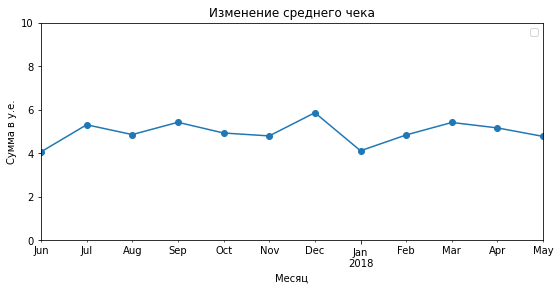

In [60]:
ax = (average_spend.plot(
                  x='order_month',
                  y='average_bill', 
                  figsize=(9,4),
                  ylim=(0,10),
                   style='o-')
                )
plt.xlabel('Месяц')
plt.ylabel('Сумма в у.е.')
plt.title('Изменение среднего чека')
plt.legend('_Hidden label')
plt.show()

Получается, средний чек составляет от 4 до 6 у.е. По первой части проекта мы помним, что у нас были заказы с аномально высокой стоимостью, а значит, если их отбросить, средний чек будет ещё ниже. 

Видим, что колебания в целом незначительны. Относительно общего уровня заметен небольшой подъем в декабре. Это может объясняться тем, что покупатели приобретают билеты в подарок. Цены на мероприятия также могут расти в связи с повышенным спросом в праздники, а значит и потраченная сумма будет в среднем выше.

За подъемом в декабре следует спад в январе. Это может объясняться по-разному: во-первых, покупатели экономят после того, как потратились на новогодние праздники. Во-вторых, организаторы мероприятий могут предлагать скидки, чтобы стимулировать хоть какие-то продажи.

#### Средний LTV и динамика LTV

Изучим Lifetime Value (LTV). Ранее мы уже формировали когорты по месяцам, но рассчитывали среднее количество покупок на покупателя. Теперь мы поступим сходным образом, только для данных о выручке.

Сгруппируем таблицу `orders` по месяцу первой покупки и месяцу совершения заказа, а также просуммируем выручку.

In [61]:
cohorts_ltv = (orders
                   .groupby(['first_order_month', 'order_month'])
                   .agg({'revenue': sum})
                   .reset_index())
cohorts_ltv.head(10)

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
5,2017-06-01,2017-11-01,1487.92
6,2017-06-01,2017-12-01,1921.30
7,2017-06-01,2018-01-01,1176.56
8,2017-06-01,2018-02-01,1119.15
9,2017-06-01,2018-03-01,1225.51


Добавим в таблицу количество новых пользователей в каждой месячной когорте. Мы рассчитывали его ранее.

In [62]:
cohorts_ltv = cohorts_ltv.merge(un_buyers, on='first_order_month')
cohorts_ltv = cohorts_ltv.rename(columns={'uid': 'un_buyers'})

cohorts_ltv.head()

,first_order_month,order_month,revenue,un_buyers
0,2017-06-01,2017-06-01,9557.49,2022
1,2017-06-01,2017-07-01,981.82,2022
2,2017-06-01,2017-08-01,885.34,2022
3,2017-06-01,2017-09-01,1931.30,2022
4,2017-06-01,2017-10-01,2068.58,2022


Далее перейдем к расчету собственно метрики LTV. Нам известно, что маржинальность составляет 100%. Сохраним это значение в переменную и вычислим валовую прибыль. В нашем случае она будет равна выручке.

In [63]:
margin_rate = 1

cohorts_ltv['gross_profit'] = cohorts_ltv['revenue'] * margin_rate

На основе месяца, в который был сделан заказ, найдем возраст когорты.

In [64]:
cohorts_ltv['age'] = ((cohorts_ltv['order_month'] - cohorts_ltv['first_order_month'])
                         /np.timedelta64(1, 'M'))

cohorts_ltv['age'] = cohorts_ltv['age'].round().astype('int')

cohorts_ltv.head()

,first_order_month,order_month,revenue,un_buyers,gross_profit,age
0,2017-06-01,2017-06-01,9557.49,2022,9557.49,0
1,2017-06-01,2017-07-01,981.82,2022,981.82,1
2,2017-06-01,2017-08-01,885.34,2022,885.34,2
3,2017-06-01,2017-09-01,1931.30,2022,1931.30,3
4,2017-06-01,2017-10-01,2068.58,2022,2068.58,4


Найдем LTV, разделив валовую прибыль на количество пользователей в каждой когорте.

In [65]:
cohorts_ltv['ltv'] = cohorts_ltv['gross_profit']/cohorts_ltv['un_buyers']

LTV &mdash; накопительная метрика. Чтобы отобразить ее по когортам, построим сводную таблицу и применим метод `cumsum()`.

In [66]:
result = (cohorts_ltv.pivot_table
             (index='first_order_month',
             columns='age',
             values='ltv',
             aggfunc='mean')
             )

result.cumsum(axis=1).fillna(0).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.73,5.21,5.65,6.61,7.63,8.36,9.31,9.90,10.45,11.06,11.63,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.66,7.79,7.93,8.09,8.24,8.39,0.00
2017-08-01,5.28,5.75,6.21,6.60,7.10,7.38,7.59,8.00,8.29,8.48,0.00,0.00
2017-09-01,5.65,6.77,7.29,11.27,11.67,12.31,13.02,13.26,13.44,0.00,0.00,0.00
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,0.00,0.00,0.00,0.00
2017-11-01,5.16,5.56,5.76,6.08,6.23,6.28,6.40,0.00,0.00,0.00,0.00,0.00
2017-12-01,4.74,5.00,5.93,6.99,7.31,7.65,0.00,0.00,0.00,0.00,0.00,0.00
2018-01-01,4.14,4.43,4.73,4.88,4.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2018-02-01,4.16,4.44,4.51,4.59,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Для удобства восприятия построим тепловую карту по этой таблице.

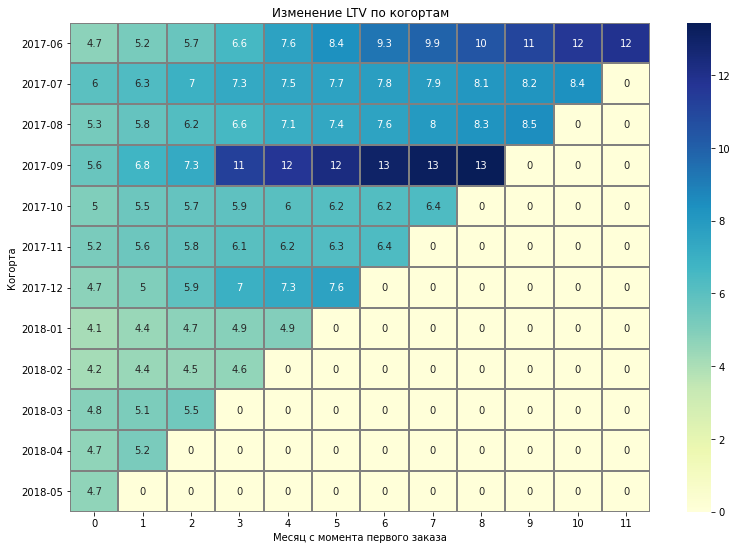

In [67]:
plt.figure(figsize=(13, 9))

ax = sns.heatmap(result.cumsum(axis=1).fillna(0), 
            annot=True, 
            linewidths=1, 
            linecolor='gray', 
            cmap="YlGnBu"
            )

ax.set_yticklabels(result.index.strftime('%Y-%m')) 

plt.xlabel('Месяц с момента первого заказа')
plt.ylabel('Когорта')
plt.title('Изменение LTV по когортам')
plt.show()

Выделяются 2 когорты с наиболее высоким LTV: июньская и сентябрьская. Они принесли максимальную валовую прибыль в пересчете на клиента за весь период.

В остальных когортах LTV растет медленно или практически не растет (посмотрим на октябрь-ноябрь). По сути это означает, что клиенты совершили покупку однажды и крайне неохотно совершают последующие.

Найдем также средний LTV по когортам за 6 месяцев. Для этого оставим только те когорты, у которых «срок жизни» не менее 6 месяцев.

In [68]:
result_av = result[~result[6].isna()]
result_av

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.726751,0.485569,0.437854,0.955143,1.023037,0.735865,0.950198,0.581879,0.553487,0.606088,0.571543,0.256983
2017-07-01,6.013345,0.335385,0.623855,0.359162,0.176883,0.156129,0.120271,0.141894,0.161316,0.147222,0.155754,NaN
2017-08-01,5.280373,0.472337,0.458817,0.391563,0.494412,0.283747,0.210818,0.405303,0.292425,0.188115,NaN,NaN
2017-09-01,5.648907,1.118453,0.519938,3.978876,0.400869,0.647569,0.702152,0.243339,0.184149,NaN,NaN,NaN
2017-10-01,5.003733,0.535763,0.191394,0.157145,0.151560,0.120362,0.084816,0.115470,NaN,NaN,NaN,NaN
2017-11-01,5.159358,0.398808,0.199703,0.325191,0.147903,0.053919,0.115012,NaN,NaN,NaN,NaN,NaN


In [69]:
result_av.cumsum(axis=1).mean(axis=0)

age
0      5.305411
1      5.863130
2      6.268390
3      7.296237
4      7.695348
5      8.028280
6      8.392157
7      9.088187
8     10.068017
9      9.256415
10    10.009315
11    11.884397
dtype: float64

Итак, на 6-й месяц жизни средний LTV у когорт составляет немногим более 8 y.е., при том что в первый месяц он в среднем равен 5 у.е. Показатель растет, но медленно, и удваивается только спустя 10 месяцев.

#### Выводы

В этой части мы изучили метрики электронной коммерции и выяснили:

- Среднее время от первого визита до первой покупки составляет меньше дня. Это значит, что средний сценарий таков: пользователи приходят на сайт и делают покупку в этот же день.
- Среднее количество покупок по всем когортам составляет 1-1.5. Самая "покупающая" из всех когорт - самая ранняя (те пользователи, которые пришли в июне 2017), в ней среднее количество покупок достигает 2 спустя 8 месяцев.
- Средний чек составляет от 4 до 6 у.е и в течение года колеблется незначительно. Есть подъем в декабре, очевидно приуроченный к праздничному сезону.
- Средний LTV у всех когорт достигает 8 у.е. за полгода жизни. Из когорт выделяются две с максимальным LTV: июньская и сентябрьская. Как мы помним, июньская когорта - самые активные покупатели по числу покупок. А у сентябрьской, вероятно, выше средний чек, но по когортам этот показатель мы не рассчитывали.

### Маркетинговые метрики

#### Общая сумма расходов на маркетинг и распределение по источникам

После того как мы изучили поведение пользователей на сайте и показатели продаж, нужно изучить, сколько средств было вложено в продвижение и окупились ли эти средства.

Сначала узнаем общую сумму расходов на маркетинг. Данные хранятся в таблице `costs`, достаточно их просуммировать.

In [70]:
print('Общая суммма расходов на маркетинг: {:.0f} у.е. '.format(costs.costs.sum()))

Общая суммма расходов на маркетинг: 329132 у.е. 


Почти 330 тысяч. Пока что это нам мало что говорит. Если мы собираемся выбрать наиболее перспективный канал или несколько каналов продвижения, хорошо бы представлять, сколько мы тратим на каждый и посмотреть на данные в динамике.

Для начала посмотрим на траты в зависимости от источника.

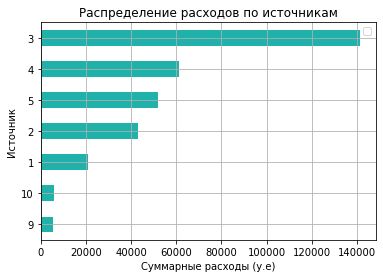

In [71]:
costs\
    .pivot_table(index='source_id', values='costs', aggfunc='sum')\
    .sort_values(by='costs')\
    .plot(kind='barh', grid=True, color='lightseagreen')
plt.xlabel('Суммарные расходы (у.е)')
plt.ylabel('Источник')
plt.title('Распределение расходов по источникам')
plt.legend('')
plt.show()

С большим отрывом лидирует **рекламный источник 3**: расходы по нему вдвое больше, чем на источник 4, и втрое &mdash; чем на источник 5. У источников 9 и 10 &mdash; минимальные траты.

Теперь оценим изменения в динамике. Сначала выделим месяцы из дат.

In [72]:
costs['month'] = costs['dt'].astype('datetime64[M]')

Далее cгруппируем данные по месяцам и источникам, а в строках просуммируем расходы.

In [73]:
costs_pivot = (costs.pivot_table
               (index='month', 
                columns='source_id', 
                values='costs', 
                aggfunc = 'sum'))
costs_pivot

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


Удобнее посмотреть на динамику на графике.

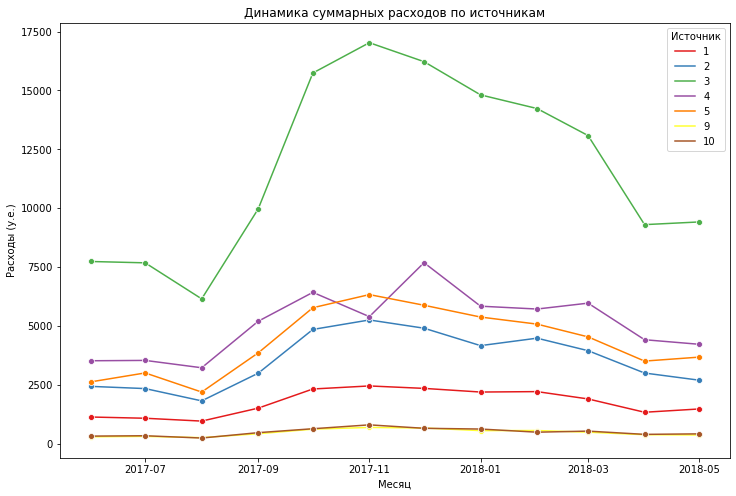

In [74]:
plt.figure(figsize = (12,8))
sns.lineplot(data=costs_pivot,
             marker='o',
              dashes=False,
             palette="Set1")
plt.title('Динамика суммарных расходов по источникам')
plt.ylabel('Расходы (у.е.)')
plt.xlabel('Месяц')
plt.legend(title='Источник')
plt.show()

На графике отчетливо видна точка роста расходов по всем источникам &mdash; это сентябрь 2017. Рост продолжался до ноября-декабря, а затем начался спад вплоть до апреля, когда расходы вышли на плато.

Конец осени и начало зимы &mdash; время распродаж. Вероятно, маркетинговая активность могла быть приурочена к этому.

Что касается отдельно взятых источников, то минимальные средства расходовались на источники 9 и 10, а максимальные &mdash; на источник 3. Если этот источник приносит хорошие покупки и окупается, то в него стоит вложиться. Если же нет, то это повод сократить на него расходы. Это мы будем выяснять далее.

#### Средний CAC (Customer Acquistion Cost)

Нас интересует стоимость привлечения одного покупателя в целом и по источникам трафика. 

Поскольку в разные моменты один и тот же покупатель мог прийти из разных источников, договоримся, что **основным источником будем считать первый** (самый ранний). 

Сгруппируем данные из таблицы `visits` по user id и источнику, чтобы получить список пар "пользователь - первый источник". Перед этим отсортируем данные в хронологическом порядке по дате посещения. 

Также добавим информацию о первом месяце посещения.

In [75]:
users_by_source = (visits
                   .sort_values(by = ['uid', 'start_time'])
                   .groupby('uid')
                   .agg({'source_id': 'first', 'month': 'first'})
                   .reset_index())

users_by_source.head()

,uid,source_id,month
0,11863502262781,3,2018-03-01
1,49537067089222,2,2018-02-01
2,297729379853735,3,2017-06-01
3,313578113262317,2,2017-09-01
4,325320750514679,5,2017-09-01


Сделаем срез из этой таблицы по внешнему датафрейму `orders`, в котором хранятся id тех, кто сделал заказ (а не просто заходил на сайт).

In [76]:
buyers_by_source = (users_by_source
                    .query('uid in @orders.uid')
                    .reset_index(drop=True))

Найдем количество уникальных покупателей за каждый месяц из каждого источника.

In [77]:
buyers_monthly = (buyers_by_source
                  .groupby(['month', 'source_id'])
                  .agg({'uid': 'nunique'})
                  .reset_index())

buyers_monthly.head()

,month,source_id,uid
0,2017-06-01,1,240
1,2017-06-01,2,373
2,2017-06-01,3,886
3,2017-06-01,4,647
4,2017-06-01,5,509


Теперь вычислим помесячные расходы с группировкой по источнику.

In [78]:
cost_monthly = (costs
                .groupby(['month', 'source_id'])
                .agg({'costs': 'sum'})
                .reset_index())

cost_monthly.head()

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


Объединим таблицы с расходами и количеством покупателей по двум параметрам: месяцу и источнику.

In [79]:
cac_monthly = cost_monthly.merge(buyers_monthly, on=['month', 'source_id'])

# переименуем столбец
cac_monthly = cac_monthly.rename(columns={'uid': 'buyers_n'})

cac_monthly.head(10)

,month,source_id,costs,buyers_n
0,2017-06-01,1,1125.61,240
1,2017-06-01,2,2427.38,373
2,2017-06-01,3,7731.65,886
3,2017-06-01,4,3514.80,647
4,2017-06-01,5,2616.12,509
5,2017-06-01,9,285.22,154
6,2017-06-01,10,314.22,113
7,2017-07-01,1,1072.88,184
8,2017-07-01,2,2333.11,278
9,2017-07-01,3,7674.37,664


Найдем собственно CAC, разделив затраты на количество покупателей, и вычислим средний CAC за весь период по всем источникам.

In [80]:
cac_monthly['cac'] = cac_monthly['costs'] / cac_monthly['buyers_n']

print('Средняя стоимость привлечения одного клиента (CAC) за весь период: {:.2f} у.е.'
        .format(cac_monthly['cac']
        .mean()))

Средняя стоимость привлечения одного клиента (CAC) за весь период: 8.56 у.е.


Итак, в среднем **привлечение одного покупателя обходится в 8.5 у.е.** Но интересует нас в первую очередь, конечно, какие из рекламных каналов наиболее выгодные.

Представим результат в виде сводной таблицы и подсчитаем средний CAC по каждому источнику.

In [81]:
cac_monthly = cac_monthly.pivot_table(
                     index='month', 
                     columns = 'source_id', 
                     values='cac', 
                     aggfunc='mean')

# подсчитаем средние значения
cac_monthly.mean()

source_id
1      7.244140
2     12.690511
3     13.769310
4      6.177851
5      7.679247
9      7.650093
10     4.737691
dtype: float64

In [82]:
cac_monthly

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,4.690042,6.507721,8.726467,5.432457,5.139725,1.852078,2.780708
2017-07-01,5.830870,8.392482,11.557786,5.236988,6.044637,3.025400,5.406885
2017-08-01,7.554048,12.490000,13.743937,7.715492,5.000641,2.416796,5.168222
2017-09-01,6.056492,11.266642,10.543439,7.438768,5.602824,3.522203,4.798646
2017-10-01,6.616429,11.535714,12.440506,5.016281,5.643249,5.036446,2.851091
2017-11-01,7.387190,12.799220,13.416344,4.203448,9.357012,4.436234,5.783650
2017-12-01,7.159633,14.664072,13.404562,5.949241,7.925128,7.151957,8.611467
2018-01-01,9.847658,16.901382,15.855225,5.976219,9.213585,9.948364,5.964563
2018-02-01,8.679055,17.077634,14.945966,6.025274,8.382331,10.605769,4.255575


Для наглядности отобразим средние показатели на столбчатой диаграмме.

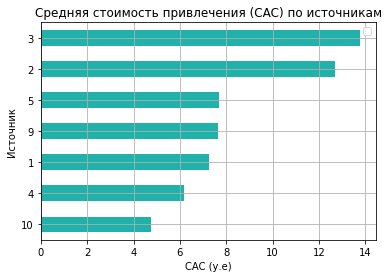

In [83]:
(cac_monthly.mean()
    .sort_values()
    .plot(kind='barh', grid=True, color='lightseagreen'))
plt.xlabel('CAC (у.е)')
plt.ylabel('Источник')
plt.title('Средняя стоимость привлечения (CAC) по источникам')
plt.legend('')
plt.show()

В среднем дороже всего обходится привлечение клиентов из рекламных источников 3 и 2. Вспомним, что 3 источник вообще составлял значимую часть от общих расходов на маркетинг.

Дешевле всего использовать каналы 4 и 10. Общие расходы на 10 источник были минимальными, так что, возможно, здесь скрыт большой потенциал.

Теперь посмотрим на изменение метрики CAC во времени.

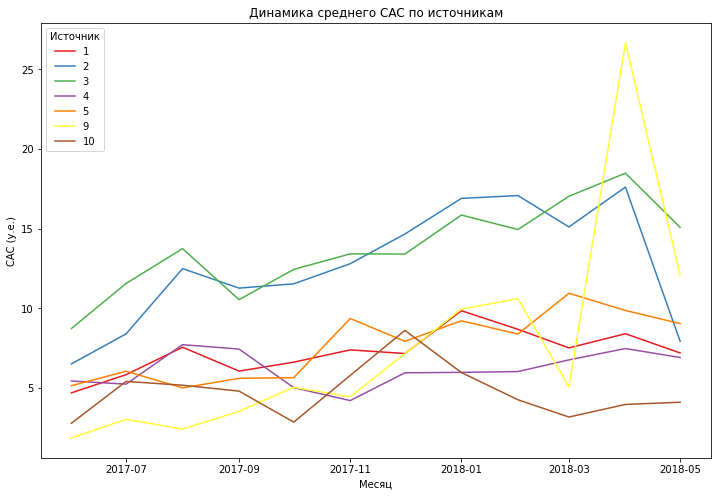

In [84]:
plt.figure(figsize = (12,8))

sns.lineplot(data=cac_monthly,                 
             dashes=False,
             palette="Set1")

plt.title('Динамика среднего CAC по источникам')
plt.legend(title='Источник')
plt.ylabel('CAC (у.е.)')
plt.xlabel('Месяц')

plt.show()

Сразу бросается в глаза, что в апреле резко выросла **стоимость привлечения из 9 источника**. Похоже, что этот источник составлял стабильную статью расходов, но в апреле принес существенно меньше клиентов, чем в остальной период &mdash; отсюда и скачок показателя.

Также вплоть до апреля 2018 **растет стоимость привлечения из 2 и 3 источников**, к маю она снижается. Если тенденция к росту сохранится, вполне вероятно, что придется сократить расходы на эти источники. Однако окончательно мы узнаем это, только рассчитав ROMI.

У 10 источника, наоборот, **тенденция к снижению стоимости привлечения** &mdash; мы видим это начиная с декабря. Это повод обратить внимание на этот источник, тем более что к маю 2018 он вообще демонстрирует самый низкий уровень CAC. 

Примерно на одном уровне держится CAC у **1, 4 и 5 источников**. Прирост за год есть, но не очень значительный и может быть связан с общим повышением цен/инфляцией.

#### Окупаемость инвестиций в маркетинг (ROMI)

В предыдущей части мы рассчитали стоимость привлечения клиентов по разным источникам. Но по одной только метрике CAC мы не можем оценить перспективность того или иного рекламного канала. Не хватает данных о прибыли. 

Теперь, чтобы свести наши расчеты воедино, рассчитаем, насколько хорошо окупились вложенные средства на продвижение по различным каналам. 

Ранее мы нашли и сохранили основной источник для всех покупателей в таблицу `buyers_by_source`. Присоединим эту таблицу к таблице `orders`, чтобы иметь возможность ассоциировать выручку с определенным источником.

In [85]:
buyers_by_source.head()

,uid,source_id,month
0,313578113262317,2,2017-09-01
1,1575281904278712,10,2017-06-01
2,2429014661409475,3,2017-10-01
3,2464366381792757,5,2018-01-01
4,2551852515556206,5,2017-11-01


In [86]:
orders_new = orders.merge(buyers_by_source[['uid', 'source_id']], on='uid')
orders_new.head()

,order_time,revenue,uid,order_date,order_month,first_order_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,3


Сохраним идентификаторы источников в список `sources`, чтобы затем выполнить расчеты и построить графики в цикле.

Методика расчета следующая: 

- отфильтруем данные о заказах, покупателях и расходах по источнику
- сформируем когорты по месяцу первого заказа
- подсчитаем количество уникальных покупателей в когорте
- вычислим валовую прибыль и LTV
- рассчитаем CAC, ROMI и добавим эти данные в таблицу
- построим тепловую карту по каждому источнику, отобразив накопительный ROMI

In [87]:
sources = [1, 2, 3, 4, 5, 9, 10]

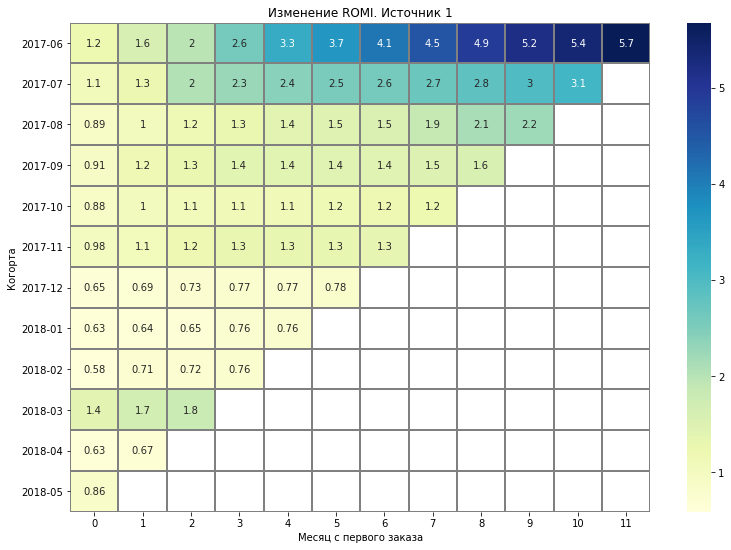

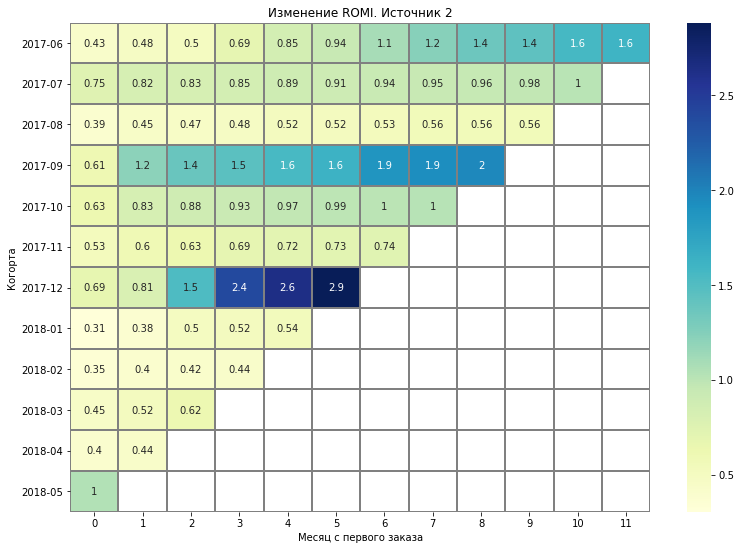

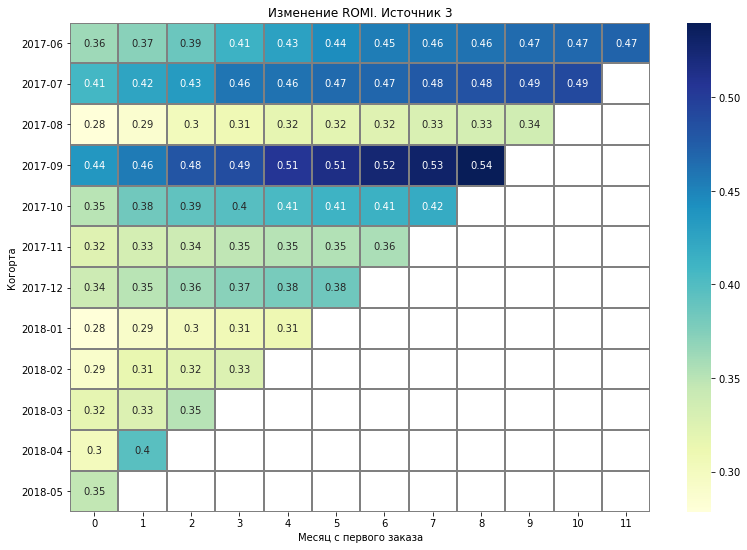

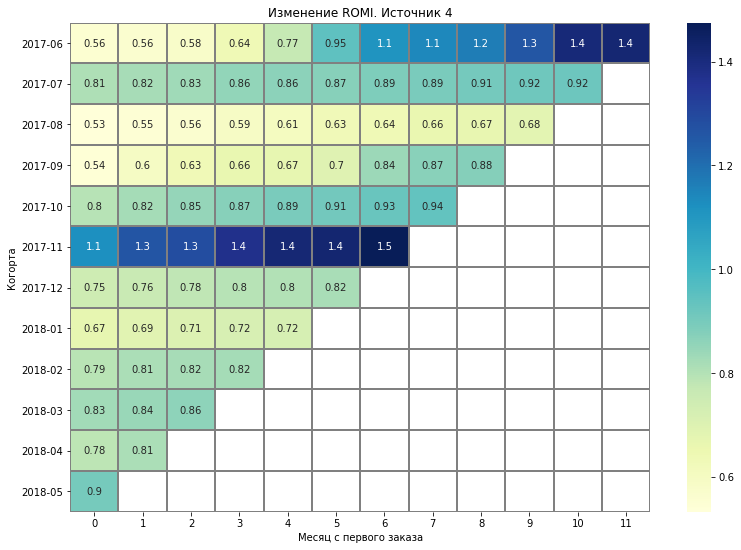

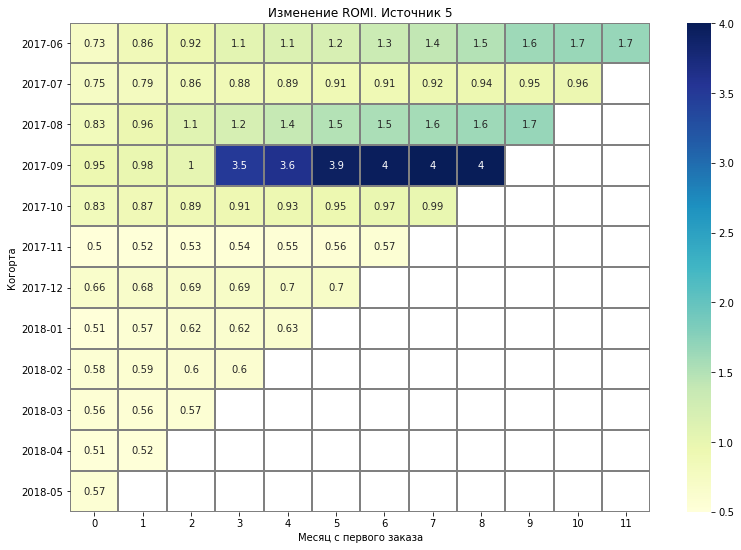

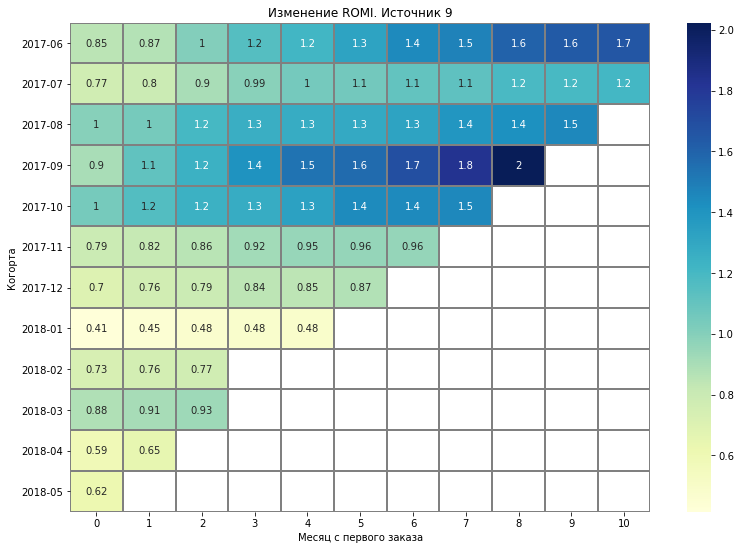

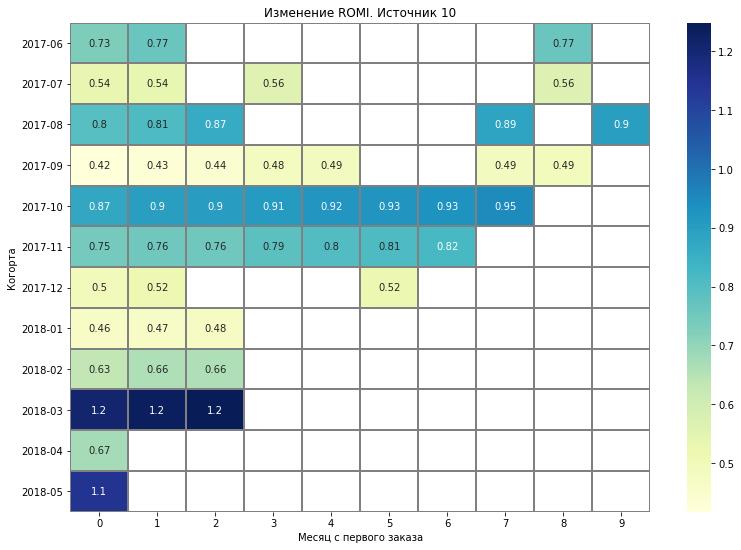

In [88]:
for source in sources:
    # отфильтруем заказы по источнику
    report = orders_new.query('source_id == @source')

  # отфильтруем покупателей по источнику
    user_ids = buyers_by_source.query('source_id == @source')

  # сформируем когорты по месяцу первого заказа
    report = (report
              .groupby(['first_order_month', 'order_month'])
              .agg({'revenue': sum})
              .reset_index())

  # подсчитаем количество уникальных покупателей в когорте с фильтрацией по источнику
    n_buyers = (first_order
            .query('uid in @user_ids.uid')
              .groupby('first_order_month')
              .agg({'uid': 'nunique'})
              .reset_index())

  # добавим количество покупателей в общую таблицу
    report = report.merge(n_buyers, on='first_order_month')

  # переименуем столбец
    report = report.rename(columns={'uid': 'n_buyers'})

  # рассчитаем возраст когорт

    report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
    report['age'] = report['age'].round().astype('int')

  # рассчитаем валовую прибыль и ltv
    report['gross_profit'] = report['revenue'] * margin_rate
    report['ltv'] = report['gross_profit'] / report['n_buyers']

  # отфильтруем расходы по источнику и найдем суммарные расходы помесячно
    costs_sum = costs.query('source_id == @source').groupby('month').agg({'costs': 'sum'})

  # добавим расходы в общую таблицу
    report = report.merge(costs_sum, left_on='first_order_month', right_on='month')

  # рассчитаем стоимость привлечения
    report['cac'] = report['costs'] / report['n_buyers']

  # рассчитаем romi
    report['romi'] = report['ltv'] / report['cac']

    final = report.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')

    plt.figure(figsize=(13, 9))

    ax = sns.heatmap(final.cumsum(axis=1), 
            annot=True, 
            linewidths=1, 
            linecolor='gray', 
            cmap="YlGnBu"
            )

    ax.set_yticklabels(final.index.strftime('%Y-%m')) 

    plt.xlabel('Месяц с первого заказа')
    plt.ylabel('Когорта')
    plt.title('Изменение ROMI. Источник ' + str(source))
    plt.show()
    print()

Проанализируем каждую из полученных тепловых карт:

- Источник 1 демонстрирует **окупаемость буквально в первые месяцы**, но только для когорт до ноября 2017. С декабря качество трафика из этого источника упало и мы практически не видим прежней окупаемости. Все равно, это отличные результаты.
- Источник 2. К 6 месяцу видим окупаемость, но не для всех когорт. Быструю окупаемость показывают июньская, сентябрьская и декабрьская когорты. 
- Источник 3 **не окупился** за все время ни для одной когорты (ROMI < 1)
- Источник 4. ROMI близок к единице у нескольких когорт по истечении 8 месяцев. Но на протяжении полугода **окупились только две когорты** (июнь и ноябрь).
- По сравнению с ним, источник 5 выглядит более перспективно. На третий месяц окупились три когорты (июнь, август, сентябрь).
- Источник 9. На третий месяц **окупились или близки к этому 5 когорт**. Результаты близки к 1 источнику, но показатели ROMI в среднем ниже.
- По источнику 10 было мало покупок, отсюда пробелы в таблице. Окупаемость показали только две когорты (мартовская и майская), но этих данных мало, чтобы рекомендовать этот источник. 

#### Выводы

Наши наблюдения по итогам анализа маркетинговых метрик:

- Три наиболее затратных рекламных источника (в порядке убывания): источники 3, 4 и 5. 
- Расходы заметно начали расти с сентября 2017 и росли три месяца, а в новом году начался спад.
- Минимальные средства расходовались на источники 9 и 10.
- В среднем привлечение одного покупателя обходится в 8.5 у.е., но привлечение из источников 3 и 2 обходится почти вдвое дороже, чем из других. Кроме того, стоимость привлечения из этих источников постоянно росла вплоть до апреля.
- У источника 10 самая  низкая стоимость привлечения (CAC) и тенденция к снижению этого показателя. 
- Лучшие показатели окупаемости показывают 1, 5 и 9 источники. Источник 3 явно убыточен &mdash; не окупился ни для одной когорты за целый год, по 10 источнику мало данных.

## Общий вывод и рекомендации

В ходе исследования мы проанализировали данные о посещениях сайта Афиши, продажах и рекламных расходах за период с июня 2017 по конец мая 2018 года.

Цель исследования &mdash; выяснить, какие источники трафика невыгодны и перераспределить бюджет, с тем чтобы снизить расходы на маркетинг.

**По итогам исследования можно рекомендовать:**

- Сократить затраты на источник 3 или вообще отказаться от него
- Сделать упор на источники 1 и 9, в меньшей степени на источники 2 и 5
- Затраты по источнику 4 сократить, если сохранится тенденция к длительной окупаемости (8 месяцев и выше)

При анализе перспективности источников мы опирались на такие метрики, как CAC (стоимость привлечения клиента) и ROMI (окупаемость маркетинговых инвестиций). 

При помощи ROMI мы можем оценить, насколько убыточной или прибыльной является маркетинговая деятельность и при необходимости скорректировать расходы. Кроме того, эта метрика позволяет "увидеть" точки окупаемости, даже если в настоящий момент бизнес убыточен.

Изучив CAC, мы увидели наибольшую статью расходов &mdash; источник 3. При высокой стоимости привлечения продажи были недостаточными, и этот источник так и не окупился за целый год.

Источники 1 и 9, напротив, продемонстрировали стабильную (как минимум у половины когорт) и быструю (от 1 месяца) окупаемость расходов. Окупаемость 5 источника ниже, а расходы высоки, поэтому он в меньшем приоритете.

**Анализ пользовательского поведения**

Изучив поведение пользователей при помощи продуктовых метрик, можно заключить:

- Средняя посещаемость и среднее количество заходов в день &mdash; довольно стабильные метрики и мало колеблются в течение года. Посещаемость заметно падает в летние месяцы, возможно, это влияние сезонности.
- Продолжительность пользовательских сессий в среднем составляет 4-5 минут. Также велико количество коротких сессий продолжительностью до 1 минуты.
- Коэффициент удержания невысок и падает в течение года: с 7-8% до 4-5% в первый месяц "жизни" клиента.

**Рекомендации:**
- Изучить влияние сезонности на посещаемость. Если оно есть, стоит продумать акции для привлечения клиентов летом.
- Принять меры для увеличения лояльности: 
    - провести анализ конкурентов, 
    - пересмотреть Customer Journey, чтобы найти точки роста и увеличить контакт с пользователем, 
    - продумать рекламные акции в течение года, 
    - оптимизировать клиентскую поддержку. 
- Проверить, нет ли проблем со скоростью загрузкой сайта или отображением страниц &mdash; это может помочь увеличить время пребывания на сайте

**Анализ метрик электронной коммерции**

В результате анализа вырисовался типичный портрет покупателя. 

Когда клиенты приходят на сайт, они уже знают, что ищут, так как проводят в среднем не более 5 минут на сайте. В завершение визита они делают покупку средней стоимостью 4-6 у.е. и, как правило, уходят, чтобы больше не возвращаться. Это подтверждается и нашим расчетом Retention Rate. Отдельные клиенты в течение года совершают вторую и последующие покупки, но их доля невысока, так как среднее количество покупок по всем когортам &mdash; 1-1.5.

**Рекомендации**:

Те же, направленные на повышение лояльности клиентов.

**Анализ маркетинговых метрик**

Маркетинговые затраты в течение года распределены неравномерно, максимум пришелся на осенние месяцы. Окупаемость по всем источникам также снизилась для когорт, пришедших после нового года.

Большие средства тратились на источники, показавшие низкую окупаемость (например, 3). Стоимость привлечения из этого источника оказалась в два-три раза выше, чем для других каналов.

**Рекомендации**:

- Перераспределить затраты в пользу более выгодных источников
- Следить за распределением затрат в течение года, чтобы не допускать "проседания" в летние месяцы

**Итоги когортного анализа**

Мы использовали когортный анализ при расчете Retention Rate, метрик электронной коммерции и маркетинговых метрик. Всюду в исследовании когорты формировались по месяцам. Некоторые из когорт выделяются на фоне других, например следующими показателями:

- Высокий коэффициент удержания (Retention Rate)
- Среднее количество покупок
- Высокий LTV
- Быстрая и высокая окупаемость (ROMI)

Однако есть тревожная тенденция - у более поздних когорт окупаемость ниже даже в перспективных источниках. 

**Рекомендации**

Рекомендуем обратить внимание на следующие когорты:
- июнь 2017 (самая "долгоживущая" когорта, максимальное среднее количество покупок, высокий LTV, хорошая окупаемость)
- август 2017 (неплохая окупаемость, по крайней мере в некоторых источниках)
- сентябрь 2017 (максимальный LTV, хорошая окупаемость, особенно из 5 источника)